# CIFAR-10

https://www.packtpub.com/mapt/book/all_books/9781787128422/3/ch03lvl1sec26/recognizing-cifar-10-images-with-deep-learning

In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#from quiver_engine import server
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

#constant
BATCH_SIZE = 128
NB_EPOCH = 20
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [3]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 

# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [5]:
# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
  
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
__________

In [6]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,
	metrics=['accuracy'])
 
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,
	epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT, 
	verbose=VERBOSE)
 
print('Testing...')
score = model.evaluate(X_test, Y_test,
                     batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

#server.launch(model)


#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 362s - loss: 1.6752 - acc: 0.4024 - val_loss: 1.3775 - val_acc: 0.5129
Epoch 2/20
40000/40000 [==============================] - 271s - loss: 1.3515 - acc: 0.5241 - val_loss: 1.2821 - val_acc: 0.5418
Epoch 3/20
40000/40000 [==============================] - 155s - loss: 1.2233 - acc: 0.5692 - val_loss: 1.1918 - val_acc: 0.5754
Epoch 4/20
40000/40000 [==============================] - 182s - loss: 1.1259 - acc: 0.6018 - val_loss: 1.1310 - val_acc: 0.6048
Epoch 5/20
40000/40000 [==============================] - 269s - loss: 1.0500 - acc: 0.6306 - val_loss: 1.1210 - val_acc: 0.6153
Epoch 6/20
40000/40000 [==============================] - 222s - loss: 0.9952 - acc: 0.6509 - val_loss: 1.1925 - val_acc: 0.5712
Epoch 7/20
40000/40000 [==============================] - 296s - loss: 0.9420 - acc: 0.6727 - val_loss: 1.0785 - val_acc: 0.6257
Epoch 8/20
40000/40000 [=======================

dict_keys(['acc', 'val_loss', 'val_acc', 'loss'])


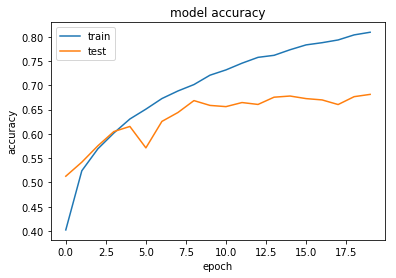

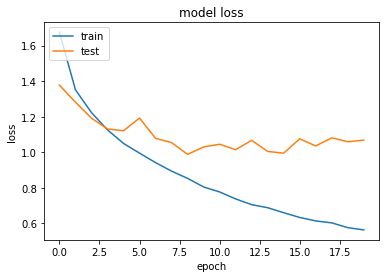

In [8]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()